In [254]:
# Dataquest to learn some panda & matplotlib

In [255]:
import pandas as pd

In [256]:
import matplotlib.pyplot as plt 

In [257]:
import seaborn as sns

In [258]:
sns.set(style="darkgrid")

In [259]:
file = pd.read_csv('fortune500.csv')

In [260]:
file.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [261]:
file.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [262]:
#Rename columns to our liking so we can easily refer to them later.
file.columns=['year','rank','company','revenue','profit']

In [263]:
file.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [264]:
# Lenght of file 25500 records one each line
len(file)

25500

In [265]:
# check file datatypes for each columns
file.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [266]:
# Profit columns its a object. We need it to be float64 just like revenue
# This indicate they might have non-integer values

In [267]:
# lets check how many of these are non-integer
non_numeric_profits = file.profit.str.contains('[^0-9.-]')

In [268]:
file.loc[non_numeric_profits]

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.
...,...,...,...,...,...
24242,2003,243,Farmland Industries,7580.2,N.A.
24296,2003,297,Land O'Lakes,5847.0,N.A.
24435,2003,436,Roundy's,3637.9,N.A.
24489,2003,490,Ace Hardware,3029.0,N.A.


In [269]:
# looks like a ton of records with strings N.A used to represent empty cells
# we used set to show us the repeting string
set(file.profit[non_numeric_profits])

{'N.A.'}

In [270]:
# Now lets see how many of these records with strings we have
len(file.profit[non_numeric_profits])

369

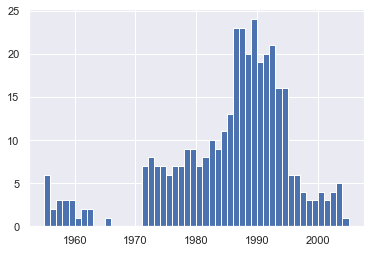

In [271]:
# Lets take a look at this non_numeric_profits values along the years.
bin_sizes, _, _ = plt.hist(file.year[non_numberic_profits], bins=range(1955, 2006))

In [272]:
# its a small fraction of our data so we are just gonna remove these rows
file = file.loc[~non_numeric_profits]

In [273]:
# lets check how many rows we have
len(file)

25131

In [278]:
# now we are gonna convert all our profit columns to flot64
file.profit = file.profit.apply(pd.to_numeric) 
file.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [280]:
# Great! our data set is ready. Now we can star plotting with matplotlib
group_by_year = file.loc[:, ['year', 'revenue', 'profit']].groupby('year')

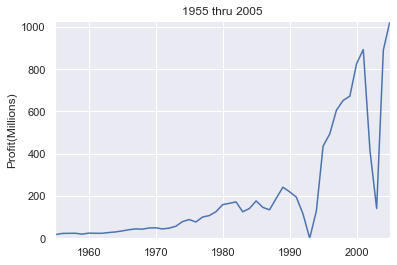

In [296]:
avgs =group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x,y, ax,title,y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x=0,y=0)
    
#Now lets plot
fig, ax = plt.subplots()
plot(x,y1,ax,'1955 thru 2005','Profit(Millions)')

In [ ]:
# Wow, that looks like an exponential, but it’s got some huge dips. They must correspond to the early 1990s recession and the dot-com bubble. It’s pretty interesting to see that in the data. But how come profits recovered to even higher levels post each recession?

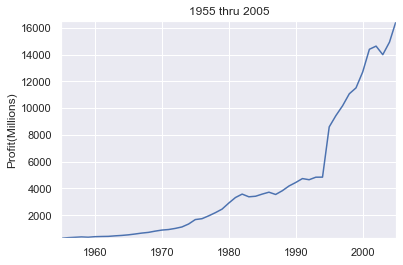

In [297]:
# Maybe revenue can tell us more
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x,y2,ax,'1955 thru 2005','Revenue(Millions)')

In [298]:
# That adds another side to the story. 
# Revenues were no way nearly as badly hit, that’s some great accounting work from the finance dep.

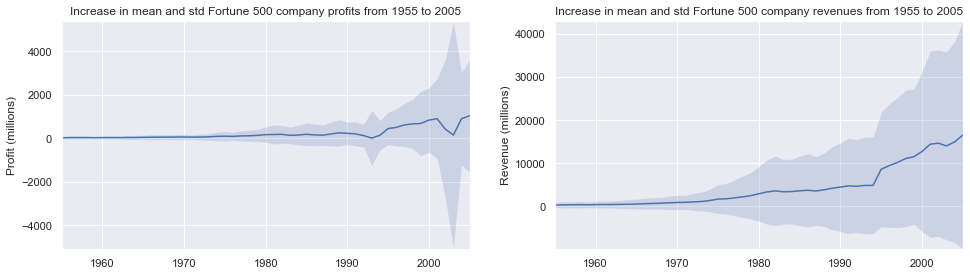

In [311]:
# With help from Stack Overflow, we can superimpose these plots with +/- their standard deviations.

def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

TypeError: not all arguments converted during string formatting

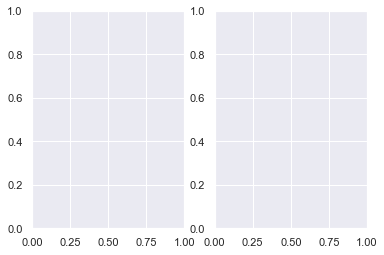

In [310]:
def plot_with_std(x,y,stds,ax,title,y_label):
    ax.fill_between(x,y - stds, y + stds, alpha=0.2)
    plot(x,y,ax,title,y_label)

fig, (ax1,ax2) = plt.subplots(ncols=2)
title = '1955 thru 2005 mean of profits'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
#plot_with_std(x,y1.values,stds1,ax1, title % 'profits', 'Profit(Milly)')
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')